# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import f1_score, accuracy_score
import scikitplot as skplt
import matplotlib.pyplot as plt

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_basic/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

--2021-11-07 20:33:38--  https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_basic/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.4’

car_data.csv.4      100%[===================>]  57.01K  --.-KB/s    in 0.001s  

2021-11-07 20:33:38 (41.5 MB/s) - ‘car_data.csv.4’ saved [58374/58374]



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,345,101,54,106,188,57,7,236,28,26,164,256,833,253,81,6,14,185,185
1,308,109,51,100,197,59,10,192,34,22,161,210,553,195,64,14,3,196,202
2,463,85,40,66,121,52,4,152,44,19,133,170,340,163,87,13,3,180,183
3,433,85,42,70,130,56,7,150,45,19,145,177,328,172,82,10,14,181,185
4,773,87,42,70,139,59,7,149,45,19,142,177,327,156,78,6,9,185,188
5,819,93,42,98,192,63,9,185,36,22,138,206,508,173,70,10,21,189,197
6,417,96,36,74,183,70,6,149,43,19,127,178,341,127,69,0,17,201,205
7,385,94,49,87,159,64,10,157,43,20,158,179,363,203,75,4,0,183,194
8,207,85,42,64,121,55,7,149,46,19,146,167,323,172,85,1,6,179,182
9,708,94,49,82,137,56,10,159,43,20,160,176,367,186,76,10,7,183,192


Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,426.264117,93.604736,44.938069,82.067395,169.364299,61.927140,8.706740,168.200364,41.051002,20.513661,148.143898,188.029144,436.211293,175.074681,72.346084,6.360656,12.244080,188.967213,195.754098
std,246.031571,8.170093,6.082147,15.759165,34.340160,8.161361,4.763338,32.682557,7.772609,2.529803,14.295221,30.606507,172.477151,31.347881,7.375517,4.952068,8.636759,5.988951,7.237600
min,0.000000,73.000000,33.000000,40.000000,104.000000,48.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,224.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.000000,33.000000,19.000000,138.000000,167.000000,317.000000,151.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,428.000000,93.000000,45.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,362.000000,174.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,639.000000,100.000000,49.000000,98.000000,196.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,216.000000,586.000000,198.000000,75.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,117.000000,59.000000,112.000000,333.000000,138.000000,55.000000,261.000000,61.000000,28.000000,186.000000,320.000000,998.000000,268.000000,135.000000,22.000000,38.000000,204.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
LR=LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3,max_iter=500)
LR.fit(X_train , y_train)
y_pred=LR.predict(X_test)
print('f1 :', f1_score(y_pred, y_test, average='macro'))
print('accurace :', accuracy_score(y_pred, y_test))
print('accurace2:', accuracy_score(y_pred,y_test,normalize=False))

# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

! pip install scikit-plot

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



f1 : 0.6680191723505828
accurace : 0.6801346801346801
accurace2: 202


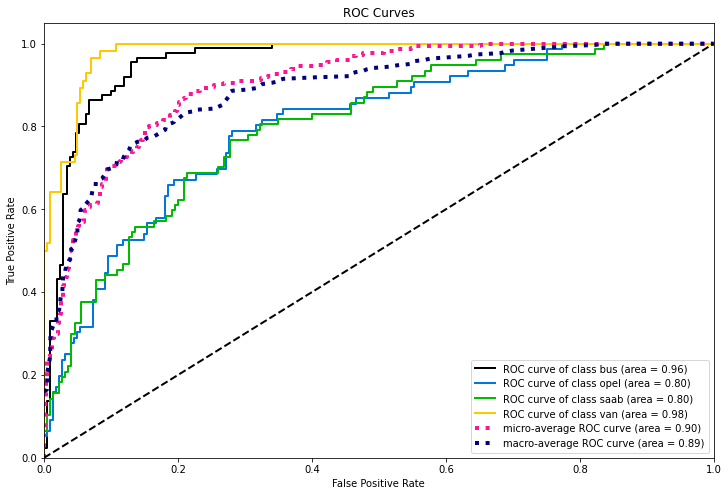

In [ ]:
import scikitplot as skplt
probs = LR.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, probs, figsize=(12, 8))

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

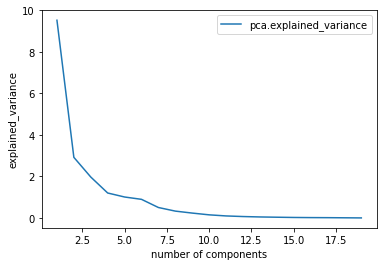

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
scaler = StandardScaler()
pca=PCA()
pca.fit(scaler.fit_transform(X_train,y_train))
plt.plot(np.arange(1, pca.explained_variance_.shape[0] +1), pca.explained_variance_, label='pca.explained_variance')
plt.ylabel('explained_variance')
plt.xlabel('number of components')
plt.legend()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
n_components = 10

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
from sklearn.pipeline import Pipeline
                                                                          
pca = PCA(n_components=10)
cls = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3,max_iter=500) 
pipe = Pipeline([('pca', pca), ('logistic', cls)])
pipe.fit(X_train , y_train)
predictions = pipe.predict(X_test)  
print('f1 :', f1_score(predictions , y_test, average='macro'))
print('accurace :', accuracy_score(predictions , y_test))
print('accurace2:',accuracy_score(predictions ,y_test,normalize=False)) 

f1 : 0.5763405445316547
accurace : 0.6026936026936027
accurace2: 179


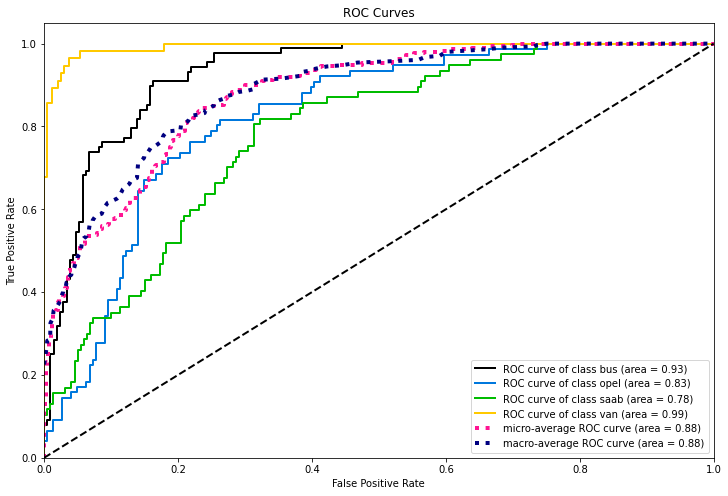

In [ ]:
import scikitplot as skplt
probs = pipe.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, probs, figsize=(12, 8))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
reg_tree = DecisionTreeClassifier()

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)
print('f1 :', f1_score(reg_tree_pred , y_test, average='macro'))
print('accurace :', accuracy_score(reg_tree_pred , y_test))
print('accurace2:',accuracy_score(reg_tree_pred ,y_test,normalize=False))

f1 : 0.7093396009079558
accurace : 0.7037037037037037
accurace2: 209


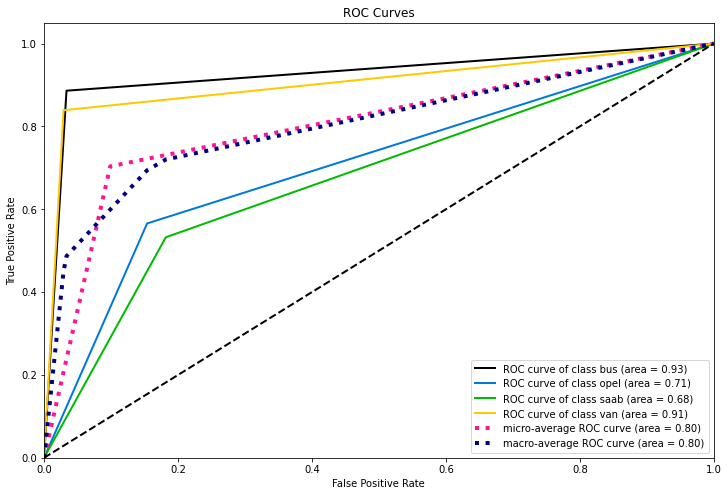

In [ ]:
import scikitplot as skplt
probs = reg_tree.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, probs, figsize=(12, 8)) 
#Как видим результаты стали хуже

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
from sklearn.ensemble import BaggingClassifier 
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
for i in range(2,100,5): 
 bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=9), 
                        n_estimators=i, 
                        random_state=0).fit(X_train, y_train) 
print( 'accuracy:', bag.score(X_test, y_test), ) 
print( 'f1:',f1_score(y_test, bag.predict(X_test), average=None), ) 

accuracy: 0.7441077441077442
f1: [0.96629213 0.57894737 0.52857143 0.87096774]


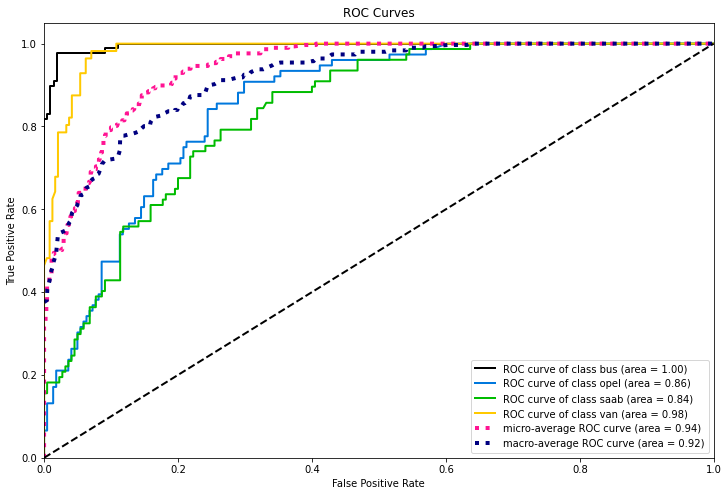

In [ ]:
import scikitplot as skplt
probs= bag.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, probs, figsize=(12, 8))

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
for i in range(2,100,5): 
 print(i, " num estimators") 
 bag = BaggingClassifier(base_estimator=LogisticRegressionCV(Cs=100, 
                                                            cv=3, 
                                                            multi_class='multinomial', 
                                                            solver='saga', 
                                                            tol=1e-3, 
                                                            max_iter=500), n_estimators=i, random_state=0).fit(X_train, y_train) 

print( 'accuracy', bag.score(X_test, y_test), ) 
print( 'f1',f1_score(y_test, bag.predict(X_test), average=None), ) 

2  num estimators
7  num estimators
12  num estimators
17  num estimators
22  num estimators


KeyboardInterrupt: ignored

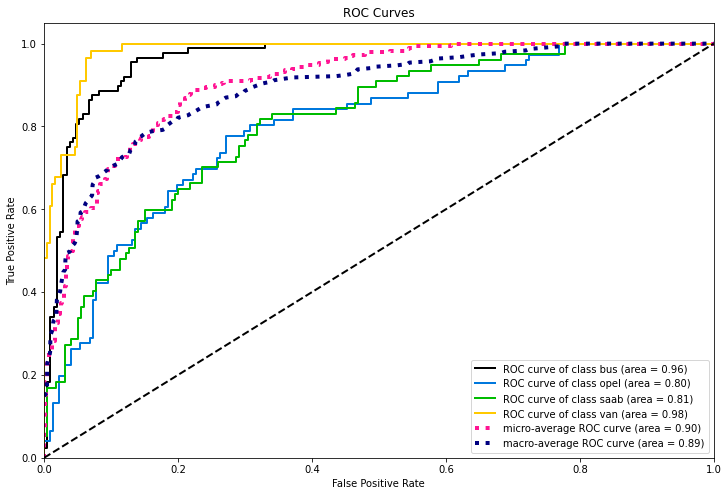

In [ ]:
import scikitplot as skplt
probs= bag.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, probs, figsize=(12, 8))

Из графиков видно, что бэггинг лог регрессии такой же, как и модель лог регрессии.
Гиперпараметры не являются оптимальными, так как каждый раз они разные.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

f1_train = []
acc_train = []
f1_test = []
acc_test = []

for n in tqdm(np.arange(1, 150, 5)):
    model_rf = Pipeline([('scale', StandardScaler()),
                 ('pca', PCA(n_components=n_components)),
                 ('clf', RandomForestClassifier(n_estimators=n))])

    model_rf.fit(X_train, y_train)
    
    f1_test.append(f1_score(y_test, model_rf.predict(X_test), average='macro'))
    f1_train.append(f1_score(y_train, model_rf.predict(X_train), average='macro'))
    
    acc_test.append(accuracy_score(y_test, model_rf.predict(X_test)))
    acc_train.append(accuracy_score(y_train, model_rf.predict(X_train)))

100%|██████████| 30/30 [00:08<00:00,  3.67it/s]


In [ ]:
pip install plot-metric

In [ ]:
from plotly.subplots import make_subplots
import sklearn.metrics as metrics
fig = make_subplots(
    rows=2,
    cols=1,
    subplot_titles=['Зависимость {} от количества базовых моделей'.format(metric) 
                        for metric in ['f1', 'accuracy']]
)

plot_metric(fig, np.arange(1, 150, 5), acc_train, acc_test, 'Random Forest', 'accuracy', 1, 1)
plot_metric(fig, np.arange(1, 150, 5), f1_train, f1_test, 'Random Forest', 'f1', 2, 1)

fig.show()

NameError: ignored

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
skf = StratifiedKFold(n_splits=10, shuffle=True)
skf_iter = skf.split(X_train, y_train)
X_train_part = []
y_train_part = []

pipe = Pipeline([('scale', StandardScaler()),
                 ('clf', LogisticRegression(multi_class='multinomial',
                                            solver='saga',
                                            tol=1e-3,
                                            max_iter=500,
                                            random_state=42))])

param_grid = {'clf__C' : np.linspace(0, 10, 100)}

f1_res = []
acc_res = []
data_size = []

for _, fold in skf_iter:
    
    if len(X_train_part) == 0:
        X_train_part = X_train[fold]
        y_train_part = y_train[fold]
    else:
        X_train_part = np.vstack((X_train_part, X_train[fold]))
        y_train_part = np.hstack((y_train_part, y_train[fold]))
        
   
    pipe.fit(X_train_part, y_train_part)
    models=pipe.predict(X_test)
    data_size.append(X_train_part.shape[0])
    print('f1 score: ', f1_score(y_test, models, average='macro'))
    print('accuracy: ', accuracy_score(y_test, models))

f1 score:  0.6016007128406322
accuracy:  0.6094276094276094
f1 score:  0.654400013061651
accuracy:  0.6666666666666666
f1 score:  0.721579873722313
accuracy:  0.7306397306397306
f1 score:  0.7410996463538855
accuracy:  0.7508417508417509
f1 score:  0.747536780501513
accuracy:  0.7575757575757576
f1 score:  0.7699328514860933
accuracy:  0.7744107744107744
f1 score:  0.7430540707539305
accuracy:  0.7508417508417509
f1 score:  0.7668890159719808
accuracy:  0.7744107744107744
f1 score:  0.7831373177503588
accuracy:  0.7878787878787878
f1 score:  0.8028570960949534
accuracy:  0.8080808080808081


С увеличением dataset рост метрик будет стабилизоваться.